<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/BayDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BAYESIAN DATA ANALYSIS**

**Description**

Bayesian data analysis is an increasingly popular method of statistical inference, used to determine conditional probability without having to rely on fixed constants such as confidence levels or p-values. In this course, you’ll learn how Bayesian data analysis works, how it differs from the classical approach, and why it’s an indispensable part of your data science toolbox. You’ll get to grips with A/B testing, decision analysis, and linear regression modeling using a Bayesian approach as you analyze real-world advertising, sales, and bike rental data. Finally, you’ll get hands-on with the PyMC3 library, which will make it easier for you to design, fit, and interpret Bayesian models.



# **1. The Bayesian Way**

Take your first steps in the Bayesian world. In this chapter, you’ll be introduced to the basic concepts of probability and statistical distributions, as well as to the famous Bayes' Theorem, the cornerstone of Bayesian methods. Finally, you’ll build your first Bayesian model to draw conclusions from randomized coin tosses.

**Bayesians vs. Frequentists (Classical)**


The Bayesian approach is a different way to look at statistical inference than what is typically taught in STATS101 classes. The latter is known as frequentist or classical statistics and is quite different from the Bayesian approach.

Let's see if you recognize the differences between these two worlds!

**Probability distributions**

Well done on the previous exercise! Now you have the general idea of what the Bayesian approach is all about. Among other things, you know that for a Bayesian, parameters of statistical models are random variables which can be described by probability distributions.

This exercise will test your ability to visualize and interpret probability distributions. You have been given a long list of draws from a distribution of the heights of plants in centimeters, contained in the variable draws. seaborn and matplotlib.pyplot have been imported for you as sns and plt, respectively. Time to get your hands dirty with data!

[7.77061503 6.23231553 7.50043364 5.17317552 9.00272371 7.88719119
 4.97030535 7.23123513 6.57761173 7.55329573 9.08278671 4.31345848
 5.17746724 4.5266322  5.68366184 9.28853627 4.46878131 6.40768012
 9.48368094 8.3480596  6.00375458 7.36286183 7.48575617 6.79894132
 6.28683043 7.04439347 7.40878411 9.76363993 4.19318786 6.30973682
 3.46757826 9.28916679 5.40521198 5.79715401 6.93354287 6.86327629
 6.44615557 8.0571253  3.70228596 3.74009057 9.94957341 7.30332111
 6.43147609 6.95165054 6.11694636 7.54234875 4.16312709 4.39193797
 6.21578896 5.92012241 4.41313882 5.42832325 5.61241429 5.83654651
 5.05046431 7.48313045 6.25230496 6.75190954 5.87254354 4.48679484
 7.46694558 6.59761967 5.97890427 5.77238081 5.15965092 4.09442984
 5.77951966 5.17667532 6.40271029 7.11636485 5.84116497 7.4128635
 3.3127075  5.99984103 0.90837825 7.99160364 7.28449784 4.52574049
 4.98317282 6.57556254 4.36547222 7.33564254 5.28076617 4.90793257
 3.39536607 6.05359496 5.31826393 4.50395096 6.58085648 6.89486

<ipython-input-2-9671e16efd22>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(draws, shade=True)


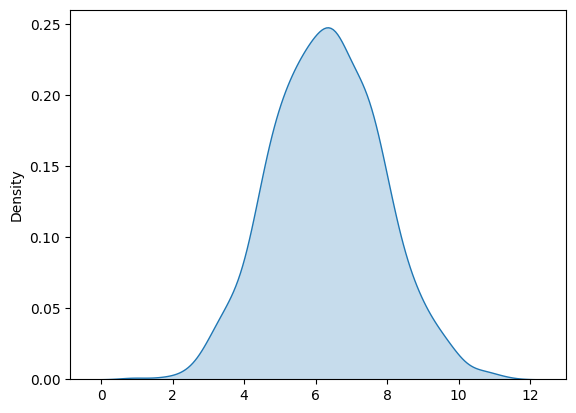

In [2]:
# import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# make draws with
draws = np.random.normal(6.26, 1.5, 1000)


# Print the list of draws
print(draws[:100])

# Print the length of draws
print(len(draws))

# Plot the density of draws
sns.kdeplot(draws, shade=True)
plt.show()

BAYES THEOREM
$$P(A/B) = \frac{P(B/A) P(A)}{P(B)} $$

**Let's play cards**
You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability you've learned about in the last video, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.

In [3]:
# Calculate probability of drawing a king or queen
p_king_or_queen = 4 / 52 + 4 / 52
print(p_king_or_queen)
# The probability of drawing a king or a queen is the sum of the two respective probabilities.

# Calculate probability of drawing <= 5
p_five_or_less = 4 / 52 + 4 / 52 + 4 / 52 + 4 / 52
print(p_five_or_less)
# There are four suits, and aces do not count (thus, you are looking for the total number of 2s, 3s, 4s, and 5s).

# Calculate probability of drawing four aces
p_all_four_aces = 4 / 52 * 3 / 51 * 2 / 50 * 1 / 49
print(p_all_four_aces)
# The probability of drawing four aces in a row is the product of the four respective probabilities (remember that once you have \
# drawn the first card, there are 51 left, so the probability of drawing any one particular card in the second draw is 1/51, and so on).


print("Probably well done! The chance of drawing four aces straight is 0.00037%, \
so don't hope for it too much! Now that you're an expert in manipulating probabilities, \
let's take a look at Bayes' Theorem and how to use it to detect spam messages.")

0.15384615384615385
0.3076923076923077
3.693785206390249e-06
Probably well done! The chance of drawing four aces straight is 0.00037%, so don't hope for it too much! Now that you're an expert in manipulating probabilities, let's take a look at Bayes' Theorem and how to use it to detect spam messages.


**Bayesian spam filter**

Well done on the previous exercise! Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: spam detection.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! Hence you've prepared a DataFrame called emails with two variables: spam, whether the email was spam, and contains_3_exlc, whether it contains the string "!!!". The head of the data looks like this:

In [4]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create DataFrame
df = pd.DataFrame({
    'spam': np.random.choice([True, False], size=250),
    'contains_3_excl': np.random.choice([True, False], size=250)
})

# Display first few rows
print(df.head())

# Display summary statistics
print("\nValue counts:")
print("\nSpam:")
print(df['spam'].value_counts())
print("\nContains 3 exclamation marks:")
print(df['contains_3_excl'].value_counts())

    spam  contains_3_excl
0   True            False
1  False             True
2   True            False
3   True             True
4   True             True

Value counts:

Spam:
spam
True     126
False    124
Name: count, dtype: int64

Contains 3 exclamation marks:
contains_3_excl
False    132
True     118
Name: count, dtype: int64


In [5]:
# Calculate and print the unconditional probability of spam
emails = df
p_spam = emails["spam"].mean()
print(p_spam)

# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails["contains_3_excl"].mean()
print(p_3_excl)

# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails.loc[emails["spam"]]["contains_3_excl"].mean()
print(p_3_excl_given_spam)

# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = p_3_excl_given_spam * p_spam / p_3_excl
print(p_spam_given_3_excl)

"Good job! If an email contains the '!!!', you can be 50% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!"

0.504
0.472
0.47619047619047616
0.5084745762711864


"Good job! If an email contains the '!!!', you can be 50% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!"

**What does the test say?**

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people (s) suffer from it.

The test result came back positive (p). What is the probability that the patient is indeed sick? You can use Bayes' Theorem to answer this question. Here is what you should calculate:


$$P(s/p) = \frac{P(p/s) * p(s)}{P(p)}$$

In [6]:
# Solving
p_s = 1/1000
p_p = 0.02
p_p_given_s = 0.99
p_s_given_p = p_p_given_s * p_s / p_p
print(p_s_given_p)

# Correct! Not very intuitive, is it? Even though the test is great at discovering
#the disease and raises false alarms rather seldom, a positive result means only a
#5% probability that the patient is sick! Let's move forward to the final lesson of Chapter 1, where you will see a Bayesian statistical model in action!

0.049499999999999995


**Tossing a coin**

In the video, you have seen our custom get_heads_prob() function that estimates the probability of success of a binomial distribution. In this exercise, you will use it yourself and verify whether it does its job well in a coin-flipping experiment.

Watch out for the confusion: there are two different probability distributions involved! One is the binomial, which we use to model the coin-flipping. It's a discrete distribution with two possible values (heads or tails) parametrized with the probability of success (tossing heads). The Bayesian estimate of this parameter is another, continuous probability distribution. We don't know what kind of distribution it is, but we can estimate it with get_heads_prob() and visualize it.

numpy and seaborn have been imported for you as np and sns, respectively.

In [7]:
def get_heads_prob(tosses, window_size: int = 100) -> np.ndarray:
    """
    Calculate rolling probability of heads over a series of coin tosses.

    Args:
        tosses (array-like): Array of coin tosses (0 for tails, 1 for heads)
        window_size (int): Size of rolling window for probability calculation

    Returns:
        np.ndarray: Array of rolling probabilities
    """
    # Convert to numpy array if not already
    tosses = np.array(tosses)

    # Calculate cumulative sum and indices
    cumsum = np.cumsum(tosses)
    indices = np.arange(1, len(tosses) + 1)

    # Calculate rolling probabilities
    probabilities = cumsum / indices

    # Remove first window_size-1 elements to avoid unstable estimates
    return probabilities[window_size-1:]

In [8]:
# Original function for get_heads
def get_heads_prob(tosses, window_size: int = 100) -> np.ndarray:
  num_heads = np.sum(tosses)
  # Prior: Beta(1,1)
  # Return Posterio
  return np.random.beta( num_heads+1, len(tosses)-num_heads+1, window_size)

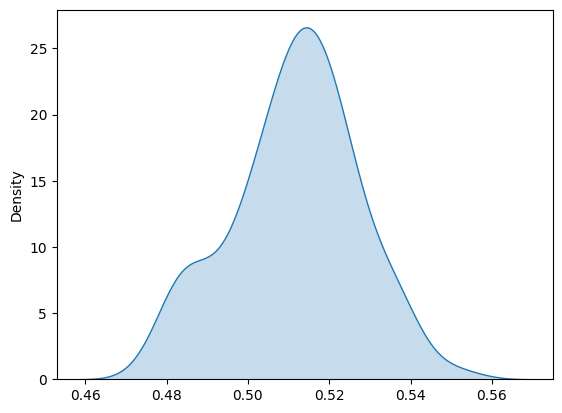

In [9]:

# Generate 1000 tosses
tosses = np.random.binomial(1, 0.5, size=1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
#sns.kdeplot(heads_prob, shade=True, label="heads probabilty")
sns.kdeplot(heads_prob, fill=True, label="heads probabilty")
plt.show()


#Well done! The density plot peaks around 50%, indicating that the model has estimated
#the heads probability well. Now that you're familiar with get_heads_prob(), let's explore it in more detail in the next exercise!

**The more you toss, the more you learn**

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say? Let's find out! numpy and seaborn have been imported for you as np and sns, respectively.

<ipython-input-10-1cd59eca76d6>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_nodata, shade=True, label="no data")


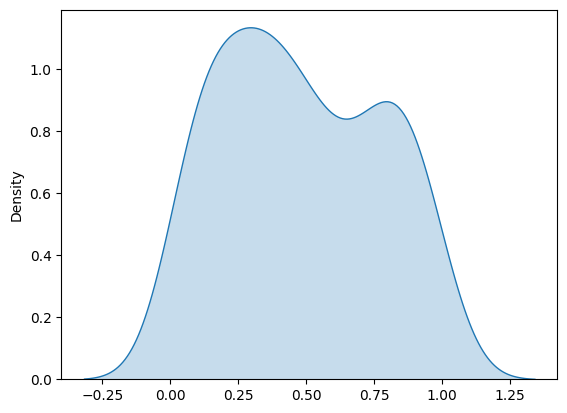

In [10]:
#Estimate the heads probability using get_heads_prob() based on an empty list, assign the result to heads_prob_nodata and visualize it on a density plot.

# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob([])
sns.kdeplot(heads_prob_nodata, shade=True, label="no data")
plt.show()

<ipython-input-11-ef19d2133732>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")


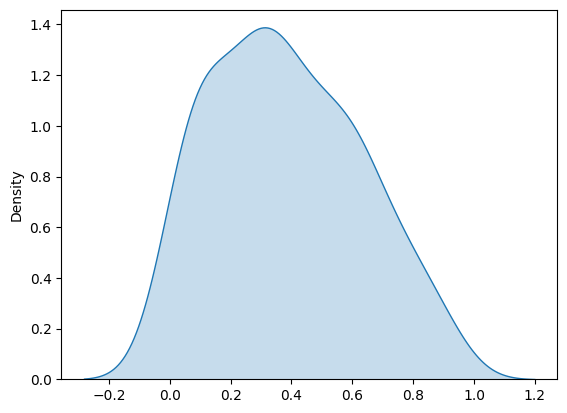

In [11]:
# Do the same, this time based on a single tails (a list with a single 0) and assigning the result to heads_prob_onetails.

# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob([0])
sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")
plt.show()

<ipython-input-12-4b3ecd907f46>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")


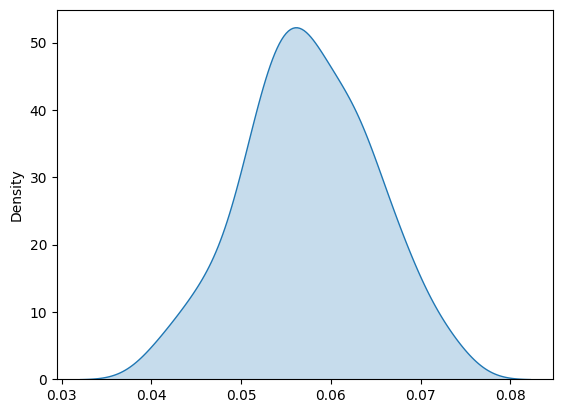

In [12]:
# Generate a list of 1000 tosses with a biased coin which comes up heads only 5% of all times and assign the result to biased_tosses.
# Estimate the heads probability based on biased_tosses, assign the result to heads_prob_biased and visualize it on a density plot.

# Estimate and plot heads probability based on 1000 tosses with a biased coin
biased_tosses = np.random.binomial(1, 0.05, size=1000)
heads_prob_biased = get_heads_prob(biased_tosses)
sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")
plt.show()


That's interesting! With no data, each possible value of the heads probabilty is equally likely! That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!

**Hey, is this coin fair?**

In the last two exercises, you have examined the get_heads_prob() function to discover how the model estimates the probability of tossing heads and how it updates its estimate as more data comes in.

Now, let's get down to some serious stuff: would you like to play coin flipping against your friend? She is willing to play, as long as you use her special lucky coin. The tosses variable contains a list of 1000 results of tossing her coin. Will you play?

In this exercise, you will be doing some plotting with the seaborn package again, which has been imported for you as sns.

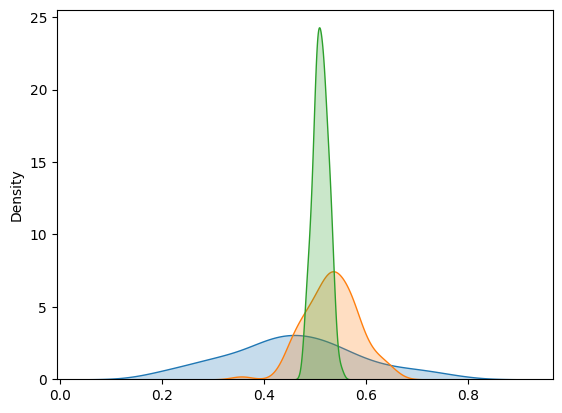

In [13]:
from textwrap import fill
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses[:10]
tosses_first_100 = tosses[:100]

# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses)

# Plot density of head probability for each subset of tosses
#sns.kdeplot(heads_prob_first_10, shade=True, label="first_10")
#sns.kdeplot(heads_prob_first_100, shade=True, label="first_100")
#sns.kdeplot(heads_prob_all, shade=True, label="all")

sns.kdeplot(heads_prob_first_10, fill=True, label="first_10")
sns.kdeplot(heads_prob_first_100, fill=True, label="first_100")
sns.kdeplot(heads_prob_all, fill=True, label="all")
plt.show()

# Bayesian Estimation

It’s time to look under the Bayesian hood. You’ll learn how to apply Bayes' Theorem to drug-effectiveness data to estimate the parameters of probability distributions using the grid approximation technique, and update these estimates as new data become available. Next, you’ll learn how to incorporate prior knowledge into the model before finally practicing the important skill of reporting results to a non-technical audience.


**Towards grid approximation**

Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

numpy and pandas have been imported for you as np and pd, respectively.

In [14]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0, 11, 1)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

" Well done! You have prepared a fine grid of possible values for the parameter \
you want to estimate (the efficacy rate), for all possible results of the experiment \
(the number of patients cured by the drug). Uh-oh, it looks like the results \
have just arrived! Let's make use of them in the next exercise!"

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


" Well done! You have prepared a fine grid of possible values for the parameter you want to estimate (the efficacy rate), for all possible results of the experiment (the number of patients cured by the drug). Uh-oh, it looks like the results have just arrived! Let's make use of them in the next exercise!"

**Grid approximation without prior knowledge**

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

A DataFrame df with all possible combinations of the number of patients cured and the efficacy rate which you created in the previous exercise is available in the workspace.

uniform and binom have been imported for you from scipy.stats. Also, pandas and seaborn are imported as pd and sns, respectively.

<ipython-input-15-77d6dca334b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


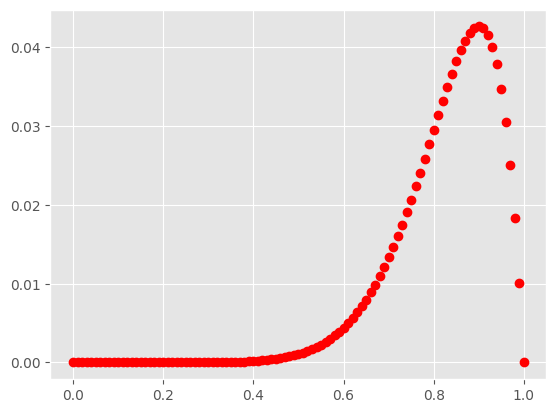

'Good job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the  result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!'

In [15]:
from scipy.stats import uniform, binom
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
#sns.lineplot(df_9_of_10_cured["efficacy_rate"], df_9_of_10_cured["posterior_prob"])
plt.plot(df_9_of_10_cured["efficacy_rate"], df_9_of_10_cured["posterior_prob"], "ro")
plt.show()

"Good job! As we might have expected, observing 9 out of 10 patients cured results in \
the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty\
 there is in the posterior distribution: even the efficacy of 50% is plausible. This is the\
  result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!"

**Updating posterior belief**

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

The DataFrame you created in the previous exercise, df, is available in the workspace and binom has been imported for you from scipy.stats.

<ipython-input-16-282cfda819f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


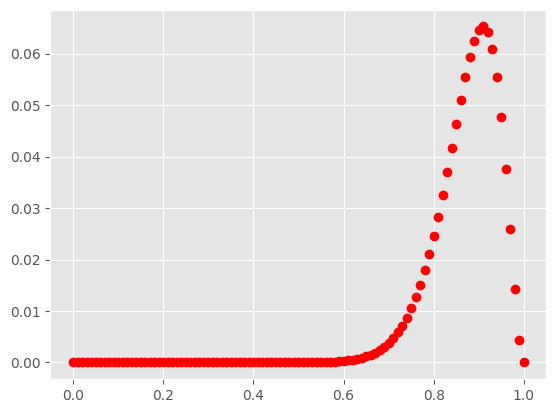

In [16]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

# plot the new data

plt.plot(df_10_of_12_cured["efficacy_rate"], df_10_of_12_cured["new_posterior_prob"], "ro")
plt.show()

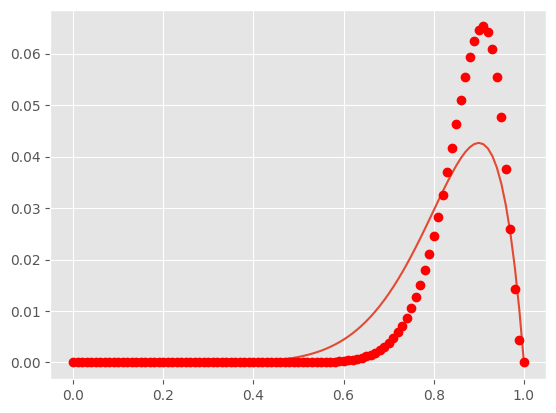

"Adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus."

In [17]:
#sns.lineplot(df_10_of_12_cured["efficacy_rate"],
  #           df_10_of_12_cured["new_posterior_prob"],
 #            label="new posterior")
plt.plot(df_9_of_10_cured["efficacy_rate"],
         df_9_of_10_cured["posterior_prob"],
         label="old posterior")
#plt.legend()
#sns.lineplot(df_9_of_10_cured["efficacy_rate"],
#             df_9_of_10_cured["posterior_prob"],
 #            label="old posterior = new prior")
plt.plot(df_10_of_12_cured["efficacy_rate"],
         df_10_of_12_cured["new_posterior_prob"],
         "ro")
plt.show()

"The new posterior is higher and narrower than the old one, which means there is less uncertainty in the estimation."
"Adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus."

**The truth of the prior**

Choosing the prior distribution is a very important step in Bayesian data analysis. Can you classify the following statements about the prior distribution as either true or false?

- To avoid been accused of cherry picking, choose a prior with robust assumptions - T
- The prior should be choosen before one sees the data - T
- Prior have no impact on data - F

Choosing a prior: Correct! Beta(5, 2) seems to be a good prior: it captures the external information about our parameter of interest and is based on previous scientific research. Let's use it in your analysis!

**Simulating posterior draws**
You have just decided to use a Beta(5, 2) prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!

You know that if the prior is Beta (a,b) , then the posterior is Beta(x, y) , with:

$x = NumberOfSuccess + a$

$y = NumberOfObservation - NumberOfSuccess + b $

<ipython-input-18-0bb7341a027d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(posterior_draws, shade=True)


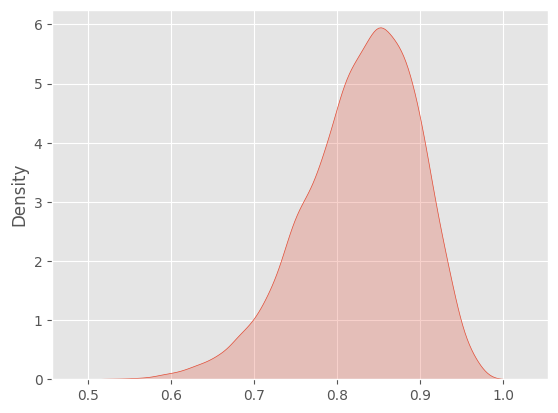

"Well done! Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your own small data, but also from other countries' experience! Now that you know how obtain posterior distributions of the parameters, let's talk about how to report these results!"

In [18]:
# Define the number of patients treated and cured
num_patients_treated = 10 + 12
num_patients_cured = 9 + 10

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, shade=True)
plt.show()

"Well done! Notice that the posterior distribuion has a slightly longer tail on the \
left-hand side, allowing for efficacy rates as small as 50%, even though in your data you \
observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your \
own small data, but also from other countries' experience! Now that you know how obtain \
posterior distributions of the parameters, let's talk about how to report these results!"

**Point estimates**

You continue working at your government's Department of Health. You have been tasked with filling the following memo with numbers, before it is sent to the secretary.

_Based on the experiments carried out by ourselves and neighboring countries, should we distribute the drug, we can expect ___ infected people to be cured. There is a 50% probability the number of cured infections will amount to at least ___, and with 90% probability it will not be less than ___._



The array of posterior draws of the drug's efficacy rate you have estimated before is available to you as drug_efficacy_posterior_draws.

Calculate the three numbers needed to fill in the memo, knowing there are 100,000 infections at the moment. numpy has been imported for you as np.

In [19]:
# Simulate posterior draws
drug_efficacy_posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 1, 10000)

# Calculate the expected number of people cured
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.median(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100_000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")


"Great! Your memo compresses the posterior distribution of the drug's efficacy to a couple of useful numbers, certainly helping the secretary decide whether to buy the new drug. However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!"

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 85675 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 86501, and with 90% probability 
it will not be less than 77107.


"Great! Your memo compresses the posterior distribution of the drug's efficacy to a couple of useful numbers, certainly helping the secretary decide whether to buy the new drug. However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!"

**Highest Posterior Density credible intervals**

You know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and you have all the means to do so. You decide to add the following to the memo.

_The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___._

You will need to calculate two credible intervals: one of 90% and another of 95% probability. The drug_efficacy_posterior_draws array is still available in your workspace.

In [20]:
#!pip install arviz

In [21]:
# Import arviz as az
import arviz as az

# Calculate HPD credible interval of 90%
ci_90 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.90)

# Calculate HPD credible interval of 95%
ci_95 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's \
efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% \
probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")
"Great Work!"

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.76 and 0.96, 
and with a 95% probability it is between 0.73 and 0.97.


'Great Work!'

**The meaning of credibility**

Well done on calculating the Highest Posterior Density credible interval in the last exercise! Here is the 90% interval you have obtained: (0.72, 0.94)

What is the proper Bayesian interpretation of this credible interval in the context of the drug's efficacy?

There is one correct answer. The other two answers provide two equivalent but differently phrased frequentist interpretations of a confidence interval.

- There is a 90% probability that the interval (0.72, 0.94) contains the drug's true efficacy rate. - F
- The probability that the drug's true efficacy rate lies in the interval (0.72, 0.94) is 90%. - T
- If you had the resources to repeat the experiment many times, in 90% of the cases the interval (0.72, 0.94) would contain the drug's true efficacy rate. - F

"Perfect, even though this was a hard one! That's the Bayesian interpretation of a credible interval. Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%". Great job on finishing Chapter 2. Next, in Chapter 3, you will apply all you've learned about the Bayesian approach to practical problems: A/B testing, decision analysis, and regression modeling. See you there!"

# 3. Bayesian Inference

Apply your newly acquired Bayesian data analysis skills to solve real-world business challenges. You’ll work with online sales marketing data to conduct A/B tests, decision analysis, and forecasting with linear regression models.

**Simulate beta posterior**

In the upcoming few exercises, you will be using the simulate_beta_posterior() function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior is:

Beta(a,b), then the posterior is Beta(x, y), with:

x = NumberOfHeads + a
y = NumberOfTosses - NumberOfHeads + b


<ipython-input-22-ba2e570f6f26>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(posterior_draws, shade=True)


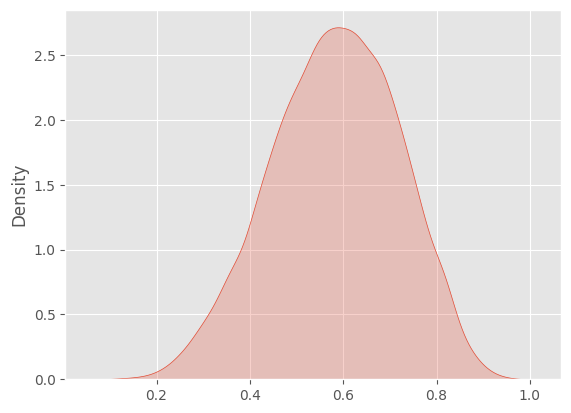

In [22]:
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a,
  len(tosses) - num_successes + beta_prior_b,
  10000)

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

<ipython-input-23-741cf549ad80>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(posterior_draws, shade=True)


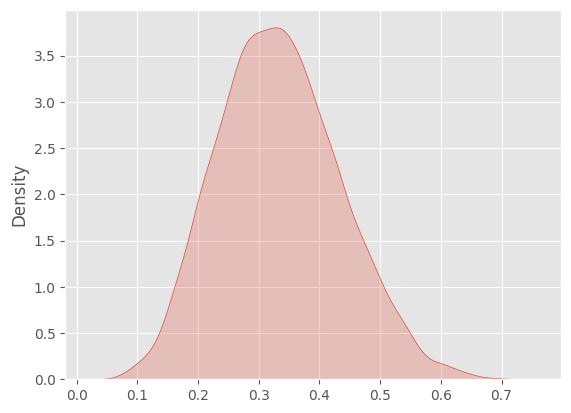

" Cool! Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing! "

In [23]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a,
  len(tosses) - num_successes + beta_prior_b,
  10000)

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()


" Cool! Now you see what simulate_beta_posterior() is doing: based on the binomial \
data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) \
prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, \
as there is little data: just 10 coin flips. Let's move on to A/B testing! "

**Posterior click rates**
After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that Beta (10,50)
 would be a good prior for the click-through rate.

 The ads data, the simulate_beta_posterior() function you saw in the video, and numpy (as np) are available in your workspace.



In [24]:
# import add data
ads = pd.read_csv("ads.csv")
ads.head(), ads.shape

ads.info(), ads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         10000 non-null  object
 1   product         10000 non-null  object
 2   site_version    10000 non-null  object
 3   time            10000 non-null  object
 4   banner_clicked  10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


(None,
                             user_id   product site_version  \
 0  f500b9f27ac611426935de6f7a52b71f   clothes      desktop   
 1  cb4347c030a063c63a555a354984562f  sneakers       mobile   
 2  89cec38a654319548af585f4c1c76b51   clothes       mobile   
 3  1d4ea406d45686bdbb49476576a1a985  sneakers       mobile   
 4  d14b9468a1f9a405fa801a64920367fe   clothes       mobile   
 
                   time  banner_clicked  
 0  2019-01-28 16:47:08               0  
 1  2019-03-31 17:34:59               0  
 2  2019-02-06 09:22:50               0  
 3  2019-05-23 08:07:07               0  
 4  2019-01-28 08:16:37               0  )

In [25]:
ads.describe()

,banner_clicked
count,10000.000000
mean,0.123400
std,0.328912
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
#[(col, col.value_count()) for col in ads if ads[col].dtype == "object"]

# in list comprehension
[print((col, ads[col].unique(), '\n')) for col in ads if ads[col].dtype == "object"]

('user_id', array(['f500b9f27ac611426935de6f7a52b71f',
       'cb4347c030a063c63a555a354984562f',
       '89cec38a654319548af585f4c1c76b51', ...,
       '3b828da744e5785f1e67b5df3fda5571',
       '6cce0527245bcc8519d698af2224c04a',
       '8cf87a02f96327a1a8a93814f34d0d0c'], dtype=object), '\n')
('product', array(['clothes', 'sneakers'], dtype=object), '\n')
('site_version', array(['desktop', 'mobile'], dtype=object), '\n')
('time', array(['2019-01-28 16:47:08', '2019-03-31 17:34:59',
       '2019-02-06 09:22:50', ..., '2019-04-15 15:59:06',
       '2019-05-21 20:43:21', '2019-03-02 21:27:57'], dtype=object), '\n')


[None, None, None, None]

<ipython-input-27-72294c5406bf>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prior_draws, shade=True, label="prior")


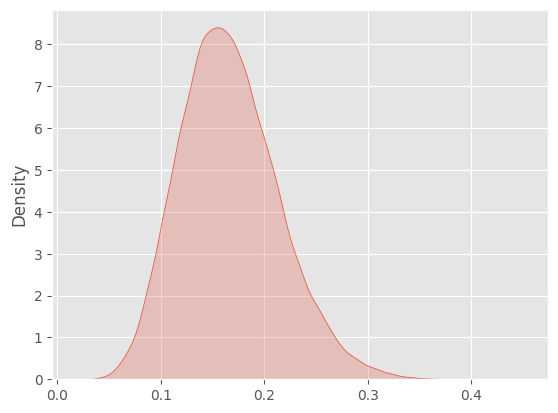

In [27]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

In [28]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
  num_successes = np.sum(trials)
  posterior_draws = np.random.beta(
    num_successes + beta_prior_a,
    len(trials) - num_successes + beta_prior_b,
    10000)
  return posterior_draws

<ipython-input-29-8f2b8fdb5be2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prior_draws, shade=True, label="prior")


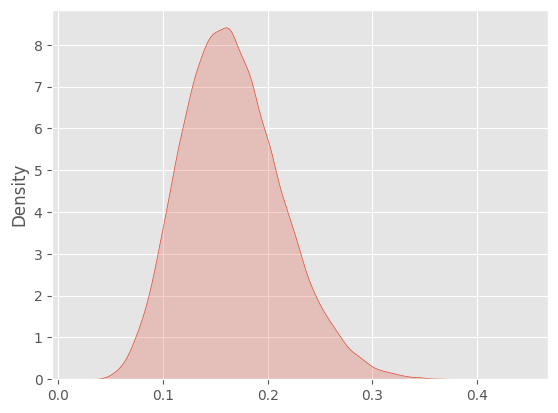

In [29]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

<ipython-input-30-2082d308ed2b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prior_draws, shade=True, label="prior")


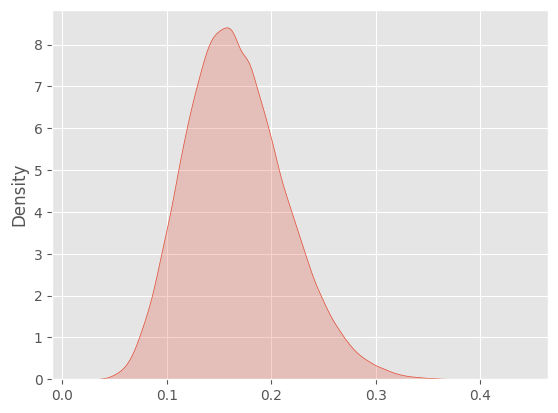


Clothes Mean Clicks/Prob:  0.13007159904534607 Nmber of possibilities:  5028 Number of clicks:  654
Sneakers Mean Clicks/Prob:  0.1166532582461786 Nmber of possibilities:  4972 Number of clicks:  580


In [30]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

print()
print('Clothes', 'Mean Clicks/Prob: ', np.mean(clothes_clicked), 'Nmber of possibilities: ',\
      len(clothes_clicked), 'Number of clicks: ', np.sum(clothes_clicked))
print('Sneakers', 'Mean Clicks/Prob: ', np.mean(sneakers_clicked), 'Nmber of possibilities: ',\
      len(sneakers_clicked), 'Number of clicks: ', np.sum(sneakers_clicked))
#print(sneakers_clicked.head())

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

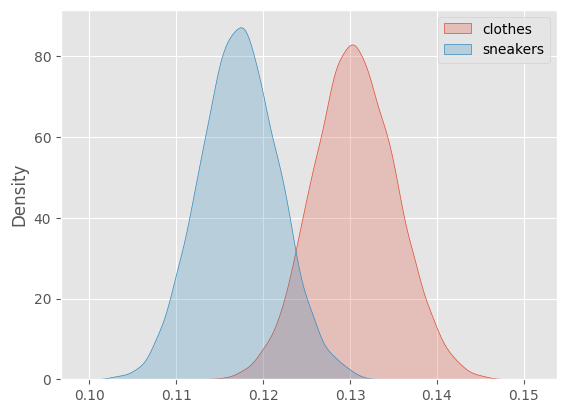

In [31]:
sns.kdeplot(clothes_posterior, fill=True, label="clothes")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.legend()
plt.show()

**A or B, and how sure are we?**

You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!

arviz, seaborn, and matplotlib.pyplot have been imported for you as az, sns, and plt, respectively. Also, clothes_posterior and sneakers_posterior which you have calculated in the previous exercise are available in your workspace.

<ipython-input-32-cf5bdd409542>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff, shade=True, label="diff")


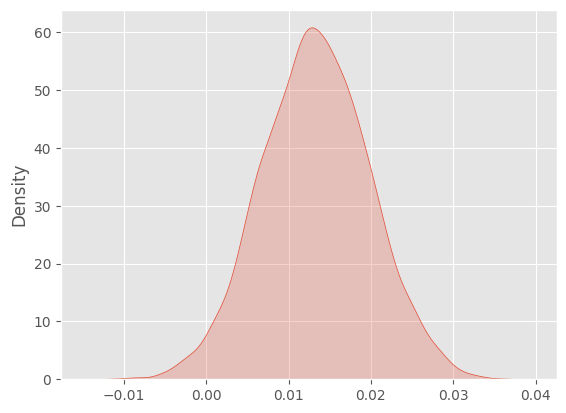

[0.00266101 0.02426961]
0.9788


"Well done! Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!"

In [32]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)


"Well done! Take a look at the posterior density plot of the difference in click rates: \
it is very likely positive, indicating that clothes are likely better. The credible \
interaval indicates that with 90% probability, the clothes ads click rate is up to \
2.4 percentage points higher than the one for sneakers. Finally, the probability that \
the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually \
sneakers ads are better! How great is that risk? Let's find out!"

**How bad can it be?**

You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

The posterior difference between the click rates, diff, is available in your workspace. Let's find out how much is at risk!

In [33]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

# Compute and print expected loss
expected_loss = np.mean(loss)
print(expected_loss)

"Terrific job! You can sefely roll out the clothes campaign to a larger audience. \
You are 98% sure it has a higher click rare, and even if the 2% risk of this being \
a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!"

-0.0025695194907573733


'Terrific job! You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!'

**Decision analysis: cost**

Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges $2.5 per click on a mobile device and $2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

Let's compare these four posterior costs using the forest plot from pymc3, which has been imported for you as pm.

In [34]:
#!pip install pymc3
#!pip install setuptools

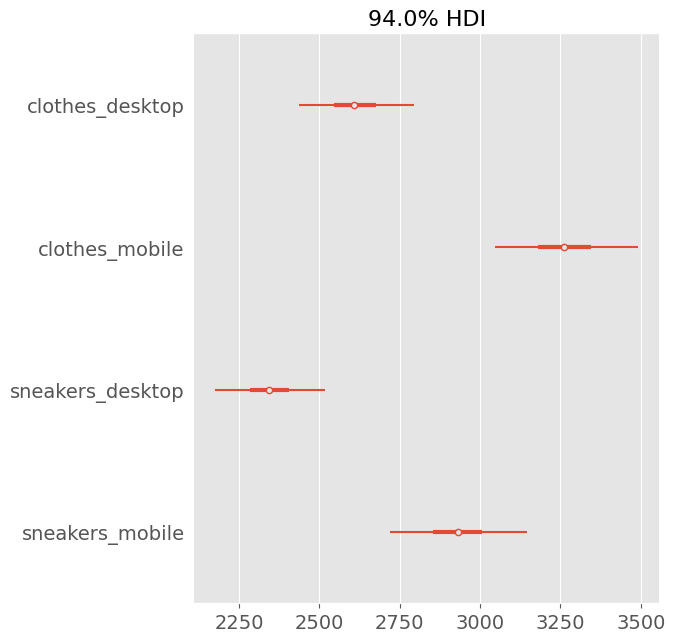

In [35]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

#!pip install pymc3
#import pymc3 as pm
#import pymc as pm
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
#pm.forestplot(ads_costs, hdi_prob=0.99, textsize=15)
#plt.show()

import arviz as az
import matplotlib.pyplot as plt

# Draw a forest plot of ads_costs
# import and filter warnngs
import warnings
warnings.filterwarnings('ignore')

az.plot_forest(ads_costs)#, hdi_prob=0.99)
plt.show()

**Decision analysis: profit**

Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is $3.4, and the one from a desktop ad is $3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.

Everything you have calculated in the previous exercise is available in your workspace: the ads_cost dictionary as well as the number of click distributions: clothes_num_clicks and sneakers_num_clicks.

In [36]:
#!pip uninstall pymc3
!pip install pymc


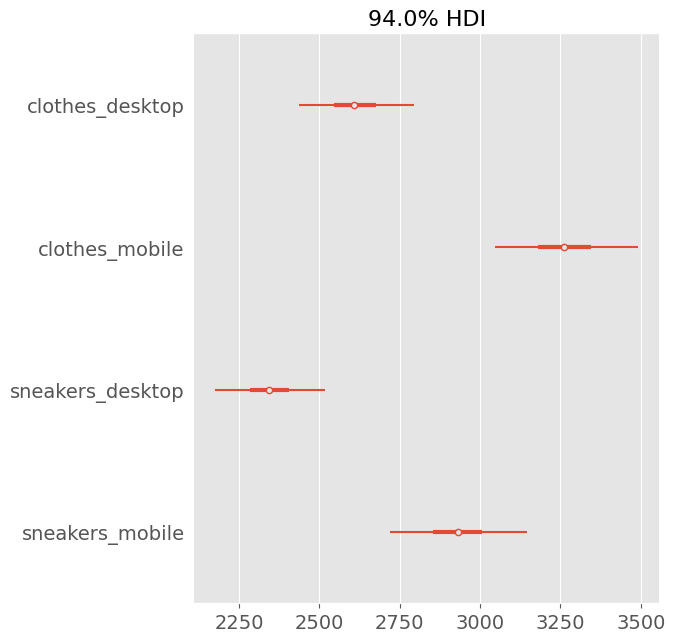

"Well done! Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!"

In [40]:
import pymc as pm

# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4 - ads_costs["clothes_mobile"],
    "sneakers_mobile": sneakers_num_clicks * 3.4 - ads_costs["sneakers_mobile"],
    "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"],
}

# Draw a forest plot of ads_profit
#pm.forestplot(ads_profit, hdi_prob=0.99)
#plt.show()

#pm.plot.forest(ads_profit, hdi_prob=0.99)
az.plot_forest(ads_costs)#, hdi_prob=0.99)
plt.show()
plt.show()

"Well done! Notice how shifting focus from costs to profit has changed the optimal decision. \
The sneakers-desktop campaign which minimizes the cost is not the best choice when you care \
about the profit. Based on these results, you would be more likely to invest in the clothes-desktop \
campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!"

**Defining a Bayesian regression model**

You have been tasked with building a predictive model to forecast the daily number of clicks based on the numbers of clothes and sneakers ads displayed to the users. You decide to use Bayesian linear regression. You've defined your model as follows:


$$y = \beta_{0} \, + \, \beta_{1} * X_{1} \, + \beta_{2} * X_{2} \, + \ldots  $$

For example:

$$ NumClicks = \beta_{0} \, + \, \beta_{1} * ClothessAdsShown \, + \beta_{2} * SneakersAdsShown  $$

For a frequentist's inference:
- $ NumClicks = \beta_{0} \, + \, \beta_{1} * ClothessAdsShown \, + \beta_{2} * SneakersAdsShown  * \epsilon $
- $\epsilon  \sim  \mathcal{N}(0,1)  $

For a Bayesian's inference:

- $ NumClicks \sim \mathcal{N} (\beta_{0} \, + \, \beta_{1} * ClothessAdsShown \, + \beta_{2} * SneakersAdsShown,  \, \sigma)  $.

$$\,$$
Consider the following model:

$ NumClicks \sim \mathcal{N} (\beta_{0} \, + \, \beta_{1} * ClothessAdsShown \, + \beta_{2} * SneakersAdsShown,  \, \sigma)  $.
where:
- $ \beta_{0}  \sim \mathcal{N}(0,  \, 0.001)  $.

 $ \beta_{1}  \sim \mathcal{N}(0.1,  \, 0.3)  $.

  $ \beta_{2}  \sim \mathcal{N}(0.2,  \, 0.2)  $.

   $ \sigma  \sim \mathbf{\mathcal{Unif}} (0,  \, 50)  $.  


   Which is incoreect?
   - With no ads displayed, you don't expect any clicks. (Lookin at beta zero, this is corect)
   - You expect the sneakers ad to have a higher click rate than the clothes ad. (Looking at beta 2 distribution mean and variance are higher.)
   - You are more certain about your prior knowledge about the clothes ad's impact on the number of clicks than about the sneakers ad's impact. (Incprrect!)

Correct, the last one's false! It's actually the other way around: you are more certain about the sneakers ad's impact, which is reflected in the corresponding prior's standard deviation. It is smaller than the one for clothes, which makes the normal prior narrower and taller, indicating less uncertainty!




**Analyzing regression parameters**

Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as intercept_draws, clothes_draws, sneakers_draws, and sd_draws, respectively.

Before you make predictions with your model, it's a good practice to analyze the posterior draws visually. In this exercise, you will first take a look at the descriptive statistics for each parameter's draws, and then you will visualize the posterior distribution for one of them as an example. pymc3 and pandas have been imported for you as pm and pd, respectively. Let's take a look at the parameters draws!

       intercept_draws  clothes_draws  sneakers_draws     sd_draws
count      1000.000000    1000.000000     1000.000000  1000.000000
mean          0.000043       0.099537        0.192377    25.151026
std           0.000973       0.290400        0.197922    13.991010
min          -0.003265      -0.921148       -0.414622     0.031545
25%          -0.000626      -0.104707        0.059525    13.779880
50%           0.000044       0.105925        0.191042    24.817511
75%           0.000673       0.300336        0.325790    36.984105
max           0.002862       1.027288        0.749678    49.785719


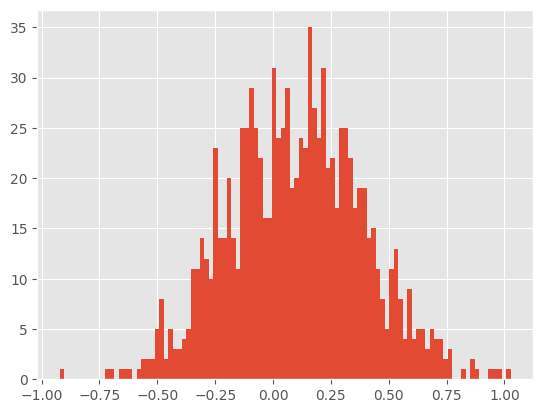

"Well done! Take a look at the output in the console and at the plot. The impact parameters of both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!"

In [48]:
# create draws
intercept_draws = np.random.normal(0, 0.001, 1000)
clothes_draws = np.random.normal(0.1, 0.3, 1000)
sneakers_draws = np.random.normal(0.2, 0.2, 1000)
sd_draws = np.random.uniform(0, 50, 1000)



# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
} , index=range(1000))

# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

# Plot clothes parameter posterior
#pm.plot_posterior(clothes_draws, hdi_prob=0.99)
# plot hist
plt.hist(clothes_draws, bins=100)
plt.show()

"Well done! Take a look at the output in the console and at the plot. \
The impact parameters of both clothes and sneakers look okay: they are positive, \
most likely around 0.1, indicating 1 additional click from 10 ad impressions, \
which makes sense. Let's now use the model to make predictions!"

**Predictive distribution**

Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.

First, you will summarize each parameter's posterior with its mean. Then, you will calculate the mean of the predictive distribution according to the regression equation. Next, you will draw a sample from the predictive distribution and finally, you will plot its density. Here is the regression formula for your convenience:

The number of clicks has a normal distribution with the mean β0 + β1 * clothes-ads-shown + β2 * sneakers-ads-shown, and some standard deviation sigma.

pymc3, numpy, and seaborn have been imported under their usual aliases.

Predicted Mean 2.9191799086613752
Standard Dev 25.151026147339813
Pred Draws Mean 2.5290237403678013


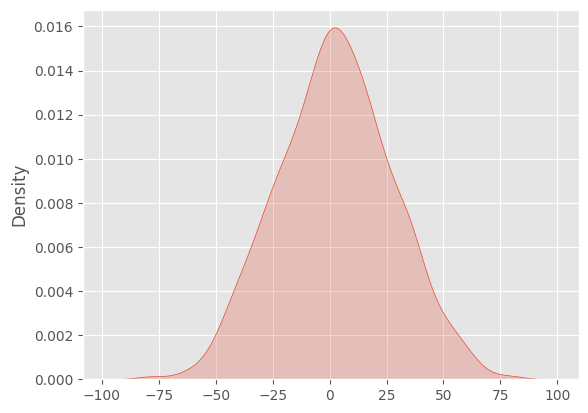

'Great job! It looks like you can expect more or less three or four clicks if you show 10 clothes and 10 sneaker ads. Head off to the final chapter of the course where you will be using the pymc3 package to carry out a full-fledged Bayesian linear regression analysis - see you there!'

In [53]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10
print('Predicted Mean', pred_mean)
print('Standard Dev', sd_coef)

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)
print('Pred Draws Mean', pred_draws.mean(
))

# Plot the density of the predictive distribution
#pm.plot_posterior(pred_draws, hdi_prob=0.99)
# Plot the density of the predictive distribution
sns.kdeplot(pred_draws, shade=True)
plt.show()

"Great job! It looks like you can expect more or less three or four clicks if you show \
10 clothes and 10 sneaker ads. Head off to the final chapter of the course where you will be using the pymc3 package to carry out a full-fledged Bayesian linear regression analysis - see you there!"